In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [8]:
data = pd.read_csv("Social_Network_Ads.csv")

In [9]:
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
271,15688172,Female,59,76000,1
365,15807525,Female,59,29000,1
102,15584545,Female,32,86000,0
244,15586996,Female,41,72000,0
85,15663939,Female,31,118000,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
def fun1(value):
    if(value=="Male"):
        return 1
    else:
        return 0
data["Gender"].apply(fun1)

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

In [16]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
data["Gender"]=data["Gender"].apply(fun1)


In [18]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


<Axes: >

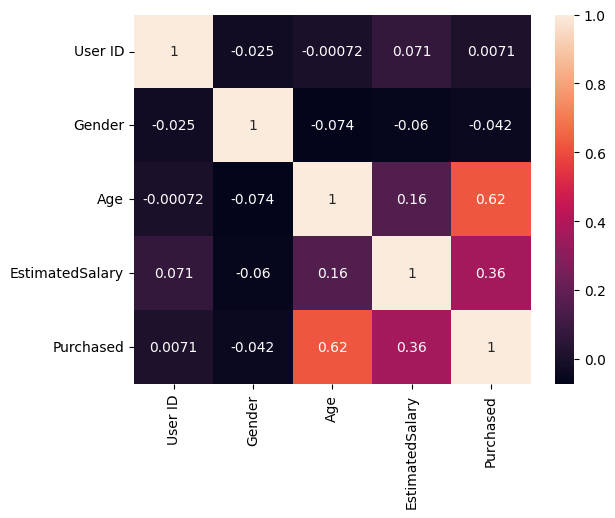

In [19]:
sns.heatmap(data.corr(),annot=True)

In [20]:
train_df=data[["Age","EstimatedSalary","Purchased"]]

In [21]:
x=train_df[["Age","EstimatedSalary"]]
y=train_df["Purchased"]

In [22]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

<Axes: >

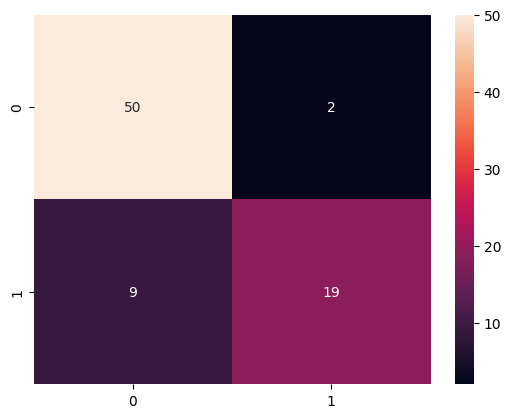

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [30]:
print(cm)

[[50  2]
 [ 9 19]]


In [31]:
print(f"TN value is {cm[0][0]}")
print(f"FP value is {cm[0][1]}")
print(f"FN value is {cm[1][0]}")
print(f"TP value is {cm[1][1]}")

TN value is 50
FP value is 2
FN value is 9
TP value is 19


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

